<!-- dom:TITLE: Data Analysis and Machine Learning: Getting started, our first data and Machine Learning encounters -->
# Calcolo differenziale con Phyton: detivate 
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University -->
<!-- Author: -->  
<!-- dom:AUTHOR: Carlo Barbieri at Department of Physics, Università Statale di Milano -->
<!-- Author: -->  
Note adattate dal corso di  **Morten Hjorth-Jensen**, Dipartimento di fisica (Università di Oslo e Michigan State University).

C. Barbieri, $\qquad$ **Dicembre 2020** (_versione preliminare_).


### Testi di riferimento

Informazioni sulla differenziazione automatica sono disponibili su [wiki](https://en.wikipedia.org/wiki/Automatic_differentiation).\
La documentazione della libreria **autograd** è disponibile [qui](https://github.com/HIPS/autograd).

<!---
Lezioni su autograd by [Alex Smola, UC Berkeley](https://www.youtube.com/watch?v=fRf4l5qaX1M&ab_channel=AlexSmola)
--->




## Differenziazione automatica

La [differenziazione automatica (AD)](https://en.wikipedia.org/wiki/Automatic_differentiation), 
nota anche come *alcoritmi di differenziazione* o *differenziazione computazionale*, is a set of
techniques to numerically evaluate the derivative of a function
specified by a computer program. AD exploits the fact that every
computer program, no matter how complicated, executes a sequence of
elementary arithmetic operations (addition, subtraction,
multiplication, division, etc.) and elementary functions (exp, log,
sin, cos, etc.). By applying the chain rule repeatedly to these
operations, derivatives of arbitrary order can be computed
automatically, accurately to working precision, and using at most a
small constant factor more arithmetic operations than the original
program.

Automatic differentiation is neither:

* Symbolic differentiation, nor

* Numerical differentiation (the method of finite differences).

Symbolic differentiation can lead to inefficient code and faces the
difficulty of converting a computer program into a single expression,
while numerical differentiation can introduce round-off errors in the
discretization process and cancellation



Python has tools for so-called **automatic differentiation**.
Consider the following example

$$
f(x) = \sin\left(2\pi x + x^2\right)
$$

which has the following derivative

$$
f'(x) = \cos\left(2\pi x + x^2\right)\left(2\pi + 2x\right)
$$

Using **autograd** we have

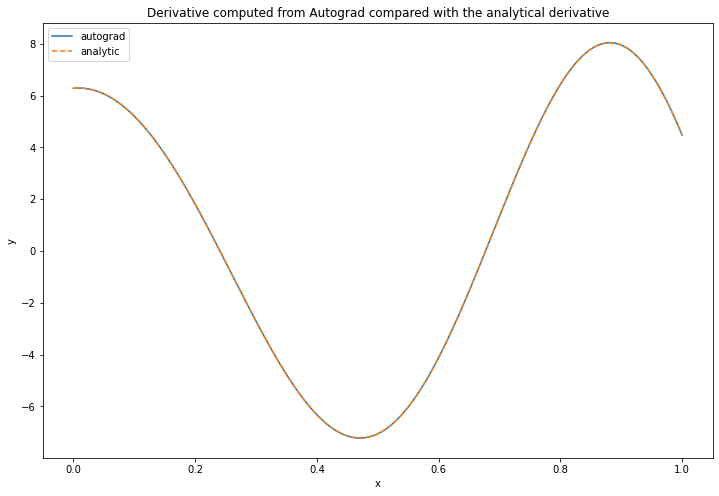

The max absolute difference is: 1.77636e-15


In [99]:
import autograd.numpy as np

# To do elementwise differentiation:
from autograd import elementwise_grad as egrad 

# To plot:
import matplotlib.pyplot as plt 


def f(x):
    return np.sin(2*np.pi*x + x**2)

def f_grad_analytic(x):
    return np.cos(2*np.pi*x + x**2)*(2*np.pi + 2*x)

# Do the comparison:
x = np.linspace(0,1,1000)

f_grad = egrad(f)

computed = f_grad(x)
analytic = f_grad_analytic(x)

plt.figure(figsize=(12,8))
plt.title('Derivative computed from Autograd compared with the analytical derivative')
plt.plot(x,computed,label='autograd')
plt.plot(x,analytic,'--',label='analytic')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

print("The max absolute difference is: %g"%(np.max(np.abs(computed - analytic))))

<!-- !split  -->
## Using autograd

Here we
experiment with what kind of functions Autograd is capable
of finding the gradient of. The following Python functions are just
meant to illustrate what Autograd can do, but please feel free to
experiment with other, possibly more complicated, functions as well.

In [100]:
import autograd.numpy as np
from autograd import grad

def f1(x):
    return x**3 + 1

f1_grad = grad(f1)

# Remember to send in float as argument to the computed gradient from Autograd!
a = 2.0

# See the evaluated gradient at a using autograd:
print("The gradient of f1 evaluated at a = %g using autograd is: %g"%(a,f1_grad(a)))

# Compare with the analytical derivative, that is f1'(x) = 3*x**2 
grad_analytical = 3*a**2
print("The gradient of f1 evaluated at a = %g by finding the analytic expression is: %g"%(a,grad_analytical))

The gradient of f1 evaluated at a = 2 using autograd is: 12
The gradient of f1 evaluated at a = 2 by finding the analytic expression is: 12


## Autograd with more complicated functions

To differentiate with respect to two (or more) arguments of a Python
function, Autograd need to know at which variable the function if
being differentiated with respect to.

In [102]:
import autograd.numpy as np
from autograd import grad
def f2(x1,x2):
    return 3*x1**3 + x2*(x1 - 5) + 1

# By sending the argument 0, Autograd will compute the derivative w.r.t the first variable, in this case x1
f2_grad_x1 = grad(f2,0)

# ... and differentiate w.r.t x2 by sending 1 as an additional arugment to grad
f2_grad_x2 = grad(f2,1)

x1 = 1.0
x2 = 5.5 

print("Evaluating at x1 = %g, x2 = %g"%(x1,x2))
print("-"*30)

# Compare with the analytical derivatives:

# Derivative of f2 w.r.t x1 is: 9*x1**2 + x2:
f2_grad_x1_analytical = 9*x1**2 + x2

# Derivative of f2 w.r.t x2 is: x1 - 5:
f2_grad_x2_analytical = x1 - 5

# See the evaluated derivations:
print("The derivative of f2 w.r.t x1: %g"%( f2_grad_x1(x1,x2) ))
print("The analytical derivative of f2 w.r.t x1: %g"%( f2_grad_x1_analytical ))

print()

print("The derivative of f2 w.r.t x2: %g"%( f2_grad_x2(x1,x2) ))
print("The analytical derivative of f2 w.r.t x2: %g"%( f2_grad_x2_analytical ))

Evaluating at x1 = 1, x2 = 5.5
------------------------------
The derivative of f2 w.r.t x1: 14.5
The analytical derivative of f2 w.r.t x1: 14.5

The derivative of f2 w.r.t x2: -4
The analytical derivative of f2 w.r.t x2: -4


Note that the grad function will not produce the true gradient of the function. The true gradient of a function with two or more variables will produce a vector, where each element is the function differentiated w.r.t a variable.


## More complicated functions using the elements of their arguments directly

In [103]:
import autograd.numpy as np
from autograd import grad
def f3(x): # Assumes x is an array of length 5 or higher
    return 2*x[0] + 3*x[1] + 5*x[2] + 7*x[3]*x[2] + 11*x[4]**2

f3_grad = grad(f3)

#x = np.linspace(0,4,5)
x = np.array([1., 3., 1., 5., 7.])

# Print the computed gradient:
print("The valuses of x[] are: ", x)

# Print the computed gradient:
print("The computed gradient of f3 is: ", f3_grad(x))

# The analytical gradient is: (2, 3, 5+7*x[3], 7*x[2], 22*x[4])
f3_grad_analytical = np.array([2, 3, 5+7*x[3], 7*x[2], 22*x[4]])

# Print the analytical gradient:
print("The analytical gradient of f3 is: ", f3_grad_analytical)

The valuses of x[] are:  [1. 3. 1. 5. 7.]
The computed gradient of f3 is:  [  2.   3.  40.   7. 154.]
The analytical gradient of f3 is:  [  2.   3.  40.   7. 154.]


Note that in this case, when sending an array as input argument, the
output from Autograd is another array. This is the true gradient of
the function, as opposed to the function in the previous example. By
using arrays to represent the variables, the output from Autograd
might be easier to work with, as the output is closer to what one
could expect form a gradient-evaluting function.

<!-- !split  -->
## Functions using mathematical functions from Numpy

In [31]:
import autograd.numpy as np
from autograd import grad
def f4(x):
    return np.sqrt(1+x**2) + np.exp(x) + np.sin(2*np.pi*x)

f4_grad = grad(f4)

x = 2.7

# Print the computed derivative:
print("The computed derivative of f4 at x = %g is: %g"%(x,f4_grad(x)))

# The analytical derivative is: x/sqrt(1 + x**2) + exp(x) + cos(2*pi*x)*2*pi
f4_grad_analytical = x/np.sqrt(1 + x**2) + np.exp(x) + np.cos(2*np.pi*x)*2*np.pi

# Print the analytical gradient:
print("The analytical gradient of f4 at x = %g is: %g"%(x,f4_grad_analytical))

The computed derivative of f4 at x = 2.7 is: 13.8759
The analytical gradient of f4 at x = 2.7 is: 13.8759


## Strutture di controllo

Autograd funziona coi codici di Python and Numpy ordinari che le strutture di cotrollo più usuali, inclusi  cicli di 'for' e 'while', istruzione condicionali 'if'  e closures.

In [108]:
import autograd.numpy as np
from autograd import grad
def f5(x):
    if x >= 0:
        return x**2
    else: 
        return -3*x + 1

f5_grad = grad(f5)

x = 0.0000

# Print the computed derivative:
print("The computed derivative of f5 at x = %g is: %g"%(x,f5_grad(x)))

The computed derivative of f5 at x = 0 is: -3


Un esempio con i loop:

In [111]:
import autograd.numpy as np
from autograd import grad
# Both of the functions are implementation of the sum: sum(x**i) for i = 0, ..., 9
# The analytical derivative is: sum(i*x**(i-1)) 

def f6(x):
    somma = 0.
    for i in range(10):
        somma = somma + x**i
    return somma

f6_grad = grad(f6)

x =  1.3

f6_grad_analytical = 0
for i in range(10):
    f6_grad_analytical += i*x**(i-1)


print("The  computed  derivative of f6 at x = %g is: %g"%(x,f6_grad(x)        ) )
print("The analytical derivative of f6 at x = %g is: %g"%(x,f6_grad_analytical) )

The  computed  derivative of f6 at x = 1.3 is: 211.418
The analytical derivative of f6 at x = 1.3 is: 211.418


## Strutture ricorsive

In [86]:
import autograd.numpy as np
from autograd import grad

def f7(n): # Assume that n is an integer
    if n == 1 or n == 0:
        return 1
    else:
        return n*f7(n-1)

f7_grad = grad(f7)

n = 4.

print("The computed derivative of f7 at n = %d is: %g"%(n,f7_grad(n)))

# The function f7 is an implementation of the factorial of n.
# By using the product rule, one can find that the derivative is:

f7_grad_analytical = 0
for i in range(int(n)-1):
    tmp = 1
    for k in range(int(n)-1):
        if k != i:
            tmp *= (n - k)
    f7_grad_analytical += tmp

print("The analytical derivative of f7 at n = %d is: %g"%(n,f7_grad_analytical))

The computed derivative of f7 at n = 4 is: 26
The analytical derivative of f7 at n = 4 is: 26


Note that if n is equal to zero or one, Autograd will give an error message. This message appears when the output is independent on input.

## Unsupported functions
Autograd supports many features. However, there are some functions that is not supported (yet) by Autograd.

Assigning a value to the variable being differentiated with respect to

In [112]:
import autograd.numpy as np
from autograd import grad
def f8(x): # Assume x is an array
    x[2] = 3
    return x*2

f8_grad = grad(f8)

x = np.array([2.1,4.2,8.4])

print("The derivative of f8 is:",f8_grad(x))

TypeError: 'ArrayBox' object does not support item assignment

Here, Autograd tells us that an 'ArrayBox' does not support item assignment. The item assignment is done when the program tries to assign x[2] to the value 3. However, Autograd has implemented the computation of the derivative such that this assignment is not possible.

## The syntax a.dot(b) when finding the dot product

In [119]:
import autograd.numpy as np
from autograd import grad
def f9(a): # Assume a is an array with 2 elements
    b = np.array([1.0,2.0])
    return a.dot(b)
    #return a[0]*b[0] + a[1]*b[1]
    #return a[0]*b[0] + (a[1]**3)*b[1]

f9_grad = grad(f9)

x = np.array([1.0,7.0])

#print("The functon f9 is:",f9(x))
print("The derivative of f9 is:",f9_grad(x))

AttributeError: 'ArrayBox' object has no attribute 'dot'

Here we are told that the 'dot' function does not belong to Autograd's
version of a Numpy array.  To overcome this, an alternative syntax
which also computed the dot product can be used:

In [120]:
import autograd.numpy as np
from autograd import grad
def f9_alternative(x): # Assume a is an array with 2 elements
    b = np.array([1.0,2.0])
    return np.dot(x,b) # The same as x_1*b_1 + x_2*b_2

f9_alternative_grad = grad(f9_alternative)

x = np.array([3.0,0.0])

print("The gradient of f9 is:",f9_alternative_grad(x))

# The analytical gradient of the dot product of vectors x and b with two elements (x_1,x_2) and (b_1, b_2) respectively
# w.r.t x is (b_1, b_2).

The gradient of f9 is: [1. 2.]


## Operazioni da evitare
La documentation racommenda di evitare operazioni implicite come

In [ ]:
a += b
a -= b
a *= b
a /=b